# Basic Statistics for Data Science with Python
Material and Exercise 
<br> **Telkomsel Data Science Academy**
<br> 9 October 2019
* * * 

## Outline 
1. Sampling Techniques
2. Descriptive Statistics
    * a. Measure of Central Tendency
    * b. Measure of Dispersion 
    * c. Correlation
3. Distribution 
4. Inferential Statistics

### 1. Sampling Techniques

To be clear about the population, sample and sampling concept, you can refer to this [link](https://towardsdatascience.com/sampling-techniques-a4e34111d808)

In [39]:
# import pandas and create data frame
import pandas as pd
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],\
                   'num_wings': [2, 0, 0, 0],\
                   'num_specimen_seen': [10, 2, 1, 8]},\
                  index=['falcon', 'dog', 'spider', 'fish'])
df

,num_legs,num_wings,num_specimen_seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1
fish,0,0,8


In [106]:
# Simple random sampling 
# Extract 3 random elements from the df
df.sample(n=3, random_state=1)

,num_legs,num_wings,num_specimen_seen
fish,0,0,8
spider,8,0,1
falcon,2,2,10


In [52]:
# A random 50% sample of the DataFrame with replacement
df.sample(frac=0.5, replace=True, random_state=1)

,num_legs,num_wings,num_specimen_seen
dog,4,0,2
fish,0,0,8


Did you know? 
<br> [Scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) comes with a few small standard datasets that DO NOT require to download any file from some external websites.

In [85]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [107]:
# Stratified Random Sampling 
size = 3        # sample size per strata/group
replace = True  # with replacement
fn = lambda x: x.sample(size, random_state=1, replace=True)
df_iris.groupby('target', as_index=False).apply(fn)

sepal length (cm)  sepal width (cm)  petal length (cm)  \
0 37                 4.9               3.1                1.5   
  43                 5.0               3.5                1.6   
  12                 4.8               3.0                1.4   
1 87                 6.3               2.3                4.4   
  93                 5.0               2.3                3.3   
  62                 6.0               2.2                4.0   
2 137                6.4               3.1                5.5   
  143                6.8               3.2                5.9   
  112                6.8               3.0                5.5   

       petal width (cm)  target  
0 37                0.1     0.0  
  43                0.6     0.0  
  12                0.1     0.0  
1 87                1.3     1.0  
  93                1.0     1.0  
  62                1.0     1.0  
2 137               1.8     2.0  
  143               2.3     2.0  
  112               2.1     2.0

### Exercise 1

In [68]:
# Extract 3 random elements from the df_iris without random_state 

# write your code here

# run this code more than 3 times. What do you observe?

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
77,6.7,3.0,5.0,1.7,1.0
67,5.8,2.7,4.1,1.0,1.0
24,4.8,3.4,1.9,0.2,0.0


In [71]:
# Extract 3 random elements from the df_iris with random_state = 10

# write your code here


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
87,6.3,2.3,4.4,1.3,1.0
111,6.4,2.7,5.3,1.9,2.0
10,5.4,3.7,1.5,0.2,0.0


In [ ]:
# Why do we have to input random_state? 
# Write your answer here! 


In [2]:
# Perform Stratified Random Sampling towards df_iris based on target, 
# in which 5 samples were selected 
# with random_state 1 and 
# without replacement. 

# Write your code here! 

# HINT!
#size = ?        # sample size per strata/group
#replace = ?  # without replacement
#fn = lambda x: x.sample(size, random_state=1, replace=True)
#df_iris.groupby('target', as_index=False).apply(fn)

### 2. Descriptive Statistics

#### a. Measure of central tendency

In [135]:
import statistics as st

In [139]:
list_sample = [18, 10, 10, 28, 29, 89, 70, 80, 14, 15, 16]
# Mean 
st.mean(list_sample)

34.45454545454545

In [140]:
# Median 
st.median(list_sample)

18

In [141]:
# Mode 
st.mode(list_sample)

10

#### b. Measure of Dispersion

In [142]:
# range 
max(list_sample) - min(list_sample)

79

In [143]:
# variance 
st.variance(list_sample)

898.8727272727273

In [144]:
# standard deviation 
st.stdev(list_sample)

29.98120623445173

In [145]:
import scipy.stats as sps
# interquartile range 
sps.iqr(list_sample)

35.0

In [146]:
# Description of data frame 
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [134]:
# Frequency
df_iris['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

#### c. Correlation
Great reference of correlation is [here](https://medium.com/fintechexplained/did-you-know-the-importance-of-finding-correlations-in-data-science-1fa3943debc2).

In [151]:
# df_iris.corr(method='pearson')
# df_iris.corr(method='spearman')
df_iris.corr(method='kendall')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.072112,0.717624,0.654960,0.670444
sepal width (cm),-0.072112,1.000000,-0.182391,-0.146988,-0.333435
petal length (cm),0.717624,-0.182391,1.000000,0.803014,0.822949
petal width (cm),0.654960,-0.146988,0.803014,1.000000,0.838757
target,0.670444,-0.333435,0.822949,0.838757,1.000000


### Exercise 2

In [4]:
# From movie dataset, load dataset from this link, assign as imdb variable. Hint: encoding = 'latin1'
# 'https://raw.githubusercontent.com/scalabretta/GroupProject--IMDB/master/Dataset/IMDB-database-update.csv'

# Write your code here! 


In [5]:
# Check data type of each column

# Write your code here! (hint: info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 36 columns):
movie_ID                     3781 non-null int64
movie_title                  3781 non-null object
duration                     3781 non-null int64
color                        3781 non-null int64
title_year                   3781 non-null int64
country                      3781 non-null object
language                     3781 non-null object
content_rating               3781 non-null object
budget_USD                   3781 non-null int64
gross_USD                    3781 non-null int64
net_USD                      3781 non-null int64
profitable                   3781 non-null int64
director_name                3781 non-null object
director_top20?              3781 non-null object
director_facebook?           3781 non-null int64
director_facebook_likes      3781 non-null int64
actor_1_name                 3781 non-null object
actor_top20?                 3781 non-null int64
acto

In [7]:
# Exclude 'object' columns for descriptive statistics purpose

# Write your code here! 


Index(['movie_ID', 'duration', 'color', 'title_year', 'budget_USD',
       'gross_USD', 'net_USD', 'profitable', 'director_facebook?',
       'director_facebook_likes', 'actor_top20?', 'actor_1_facebook?',
       'actor_1_facebook_likes', 'actor_top20?.1', 'actor_2_facebook?',
       'actor_2_facebook_likes', 'actor_top20?.2', 'actor_3_facebook?',
       'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'movie_facebook?', 'movie_facebook_likes;', 'facenumber_in_poster',
       'num_voted_users', 'num_user_for_reviews', 'imdb_score',
       'imdb_top_250'],
      dtype='object')

In [8]:
# Numeric variable: 
numeric_variable = ['duration', 'color', 'title_year', 'budget_USD',
       'gross_USD', 'net_USD', 'profitable', 'director_top20?',
       'director_facebook?', 'director_facebook_likes', 'actor_top20?',
       'actor_1_facebook?', 'actor_1_facebook_likes', 'actor_top20?.1',
       'actor_2_facebook?', 'actor_2_facebook_likes', 'actor_top20?.2',
       'actor_3_facebook?', 'actor_3_facebook_likes',
       'cast_total_facebook_likes', 'movie_facebook?', 'movie_facebook_likes;',
       'facenumber_in_poster', 'num_voted_users', 'num_user_for_reviews',
       'imdb_score', 'imdb_top_250']

In [19]:
# What is the absolute correlation value of all numeric variables towards imdb_score? Sort from 
# higher correlation to lower, and choose top 7 (include imdb_score)

# Write your code here! 


imdb_score               1.000000
num_voted_users          0.479197
imdb_top_250             0.370931
duration                 0.366997
num_user_for_reviews     0.323920
movie_facebook_likes;    0.281296
gross_USD                0.216399
Name: imdb_score, dtype: float64

In [20]:
# Create score_group column, if imdb_score > 7.5 then 'High', else 'Low'

# Write your code here! 


In [27]:
# Slicing Dataframe into two: imdb_high if score_group = 'High', imdb_low if score_group='Low'

# Write your code here! 


In [30]:
# Mean of group imdb_high and imdb_low 
column_select = ['imdb_score','num_voted_users','imdb_top_250','duration',\
                 'num_user_for_reviews','movie_facebook_likes;','gross_USD']

# Write your code here!

imdb_score                      7.93
num_voted_users            297023.74
imdb_top_250                    0.29
duration                      125.62
num_user_for_reviews          694.61
movie_facebook_likes;       24948.93
gross_USD                85587452.20
dtype: float64

### 3. Distribution 

Use method hist to know the distribution of your data. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c209240>,
      dtype=object)

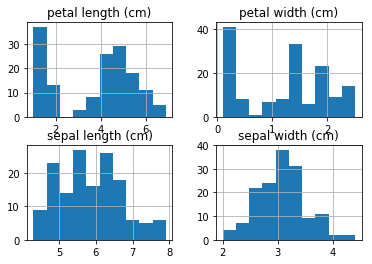

In [162]:
df_iris.drop(['target'],axis=1).hist()

For more details about distribution, refer to this [link](https://www.datacamp.com/community/tutorials/probability-distributions-python?source=post_page-----24b5b4ba43cc----------------------)

### 4. Inferential Statistics

Good references for inferential statistics are taken from [here](https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a) and [here](https://github.com/devanshmalik/Inferential-Stats-in-Python)

## Import data from Hive

Follow this instruction: https://www.edureka.co/community/24752/how-to-access-hive-via-python